#1. Scrape Data

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from pyquery import PyQuery as pq
from bs4 import BeautifulSoup
import requests

In [2]:

linkVec = []

for thisPage in [3]:#[2,3,4,5]:
    allLinkPage=requests.get("http://www.sirlinksalot.net/archives/thebachelor%d.html" % (thisPage))
    soup = BeautifulSoup(allLinkPage.text, "html.parser")
    rows = soup.find_all("a")
    for row in rows:
        rowString = str(row)
        checkASCII = [ord(letter) for letter in rowString]
        #print max(checkASCII),min(checkASCII)
        if max(checkASCII)<127 and min(checkASCII)>9:
        #    print max(checkASCII)<127 and min(checkASCII)>10
            thisLink = str(row.get("href"))
            if "sirlinksalot" not in thisLink: #remove internal links
                if "clickbank.net" not in thisLink: #remove ad links
                    if "pub43" not in thisLink: #remove ad links
                        if "bilbo" not in thisLink: #remove ad links
                            if "fastclick" not in thisLink: #remove ad links
                                if "casalemedia" not in thisLink: #remove ad links
                                    linkVec.append(thisLink)

In [3]:
print len(linkVec)

1753


In [4]:
#sort our vector to group similar website roots
linkVec = sorted(linkVec[0:20])

In [5]:
archivedLinkVec = []

count = 0;
length = len(linkVec)
for thisLink in linkVec:
    allLinkPage=requests.get("https://web.archive.org/web/*/" + thisLink)
    soup = BeautifulSoup(allLinkPage.text, "html.parser")
    if soup.find_all("div", attrs={"class": "date captures"}):
        row = soup.find_all("div", attrs={"class": "date captures"})[0]
        row = row.find("a").get("href")
        archivedLinkVec.append(str("https://web.archive.org" + row))
    count = count+1
    #print count, " out of ", length, " done"

In [6]:
#we can assume that each article from the Examiner website will have similar HTML formatting. 
#So let us also note the root page.
rootPage = []
for link in archivedLinkVec:
    first = 50#link.find("www") 
    last = link.find(".com")+4
    rootPage.append(link[first:last])

In [7]:
#collect into a data frame
linkDF = pd.DataFrame()
linkDF['archived_link']=archivedLinkVec
linkDF['root_page']= rootPage


In [8]:
myGroups = linkDF.groupby('root_page')

In [9]:
count=0
for group in linkDF.root_page.unique():
    if group:
        count = count+1
        print group
print
print "There are",count, "unique groups."
    
#this shows that the number of unique websites whose formatting we need to learn is pretty limited.

blog.zap2it.com
insidetv.ew.com
www.digitalspy.com
www.eonline.com
www.examiner.com
www.people.com
www.usmagazine.com

There are 7 unique groups.


In [10]:
#SEASON 13 BLUE BACKGROUND
season13Names =[]
season13PicLinks=[]
season13Link = "http://www.buddytv.com/slideshows/meet-the-cast-of-the-bachelor-season-13.aspx"
testPage=requests.get(season13Link)
soup = BeautifulSoup(testPage.text, "html.parser")
scripts = soup.find_all("script")

for script in scripts:
    if script.string:
        if "Slideshow.SlideshowNavigator" in str(script.string):
            mystring = str(script.string)
            myvec = mystring.split("{")
            myvec = myvec[7:32]
            for k in myvec:
                fromhere = str(k).find("Title")+8
                tohere = str(k).find("Blurb")-3
                season13Names.append(k[fromhere:tohere])
                fromhere = str(k).find("ImageId")+9
                tohere = str(k).find("PhotoCredit")-2
                season13PicLinks.append("http://images.buddytv.com/btv_2_%d_1_590_-1_0_/meet-the-cast-of--th.jpg" % int(k[fromhere:tohere]))
len(season13Names), len(season13PicLinks)


(25, 25)

In [11]:
#### SEASON 14 BLUE BACKGROUND
season14Link = "http://www.realitytea.com/2009/12/17/meet-the-25-bachelorettes-of-the-bachelor-14-on-the-wings-of-love-photos/"
season14PicLinks = []
season14Names = []
testPage=requests.get(season14Link)
soup = BeautifulSoup(testPage.text, "html.parser")
rows = soup.find_all("img")
for row in rows:
    if row.get("src"):
        if "the-bachelor-14" in row.get("src"):
            season14PicLinks.append(str(row.get("src")))
            myname = str(row.get("alt"))
            myname = myname.split("14 ")[1]
            season14Names.append(myname)
            
len(season14Names),len(season14PicLinks)
#season14Names = ["Alexa Mcallister","Ali Fedotowsky","Ashleigh Hunt","Ashley Almore","Caitlyn McCabe","Channy Choch","Christina McCasland","Corrie","Elizabeth Kitt","Elizabeth Kreft","Ella Nolan","Emily Harkins","Gia Alliemand","Jessie Sulidis","Kathryn","Kimberly","Kirsten","Michelle Kujawa","Rozlyn Papa","Sheila","Stephanie","Tenley","Tiana","Valishia Savage","Vienna Girardi"]

(26, 26)

In [12]:
#SEASON 15 BLUE BACKGROUND
season15Link = "http://www.realitytea.com/2010/12/21/photos-meet-the-25-bachelorettes-of-brad-womacks-the-bachelor-15/"
season15PicLinks = []
season15Names=[]
testPage=requests.get(season15Link)
soup = BeautifulSoup(testPage.text, "html.parser")
rows = soup.find_all("img")
for row in rows:
    if row.get("src"):
        if "the-bachelor-15" in row.get("src"):
            season15PicLinks.append(str(row.get("src")))
            season15Names.append(str(row.get("alt")))
            
len(season15Names),len(season15PicLinks)

(28, 28)

In [13]:
#SEASON 16 BLUE BACKGROUND
season16Link = "http://www.realitytea.com/2011/12/12/photos-%E2%80%93-meet-the-25-bachelorettes-of-ben-flajnik%E2%80%99s-the-bachelor-season-16/"
season16PicLinks = []
season16Names = []
testPage=requests.get(season16Link)
soup = BeautifulSoup(testPage.text, "html.parser")
rows = soup.find_all("img")
for row in rows:
    if row.get("data-lazy-src"):
        if "The_Bachelor_16_" in row.get("data-lazy-src"):
            season16PicLinks.append(str(row.get("data-lazy-src")))
            season16Names.append(str(row.get("alt")))
len(season16Names),len(season16PicLinks)

(26, 26)

In [14]:
#SEASON 17 BLUE BACKGROUND
season17Link = "http://www.realitytea.com/2012/09/28/photos-meet-the-26-bachelorettes-of-sean-lowes-the-bachelor-season-17/"
season17PicLinks = []
season17Names = []
testPage=requests.get(season17Link)
soup = BeautifulSoup(testPage.text, "html.parser")
rows = soup.find_all("img")
for row in rows:
    if row.get("data-lazy-src"):
        if "-sean-lowe-season" in row.get("data-lazy-src"):
            season17PicLinks.append(str(row.get("data-lazy-src")))
            season17Names.append(str(row.get("title")))
len(season17Names),len(season17PicLinks)

(25, 25)

In [15]:
#SEASON 18 BLUE BACKGROUND
season18Links=["http://www.usmagazine.com/entertainment/pictures/the-bachelor-season-18-meet-juan-pablos-bachelorettes-2013412/343%d" % k for k in range(71,98)]
season18PicLinks = []
season18Names = []
for link in season18Links:
    testPage=requests.get(link)
    soup = BeautifulSoup(testPage.text, "html.parser")
    rows = soup.find_all("figure")
    for row in rows:
        if row.get("data-slug"):
            if "18-meet-juan-pablos" in row.get("data-slug"):
                thisimg = row.find_all("img")[0]
                thisimg = thisimg.get("src")
                season18PicLinks.append("http:" + thisimg)
                season18Names.append(str(row.get("data-title")))
len(season18Names),len(season18PicLinks)

(27, 27)

In [16]:
#SEASON 19 BLUE BACKGROUND
season19Links = "http://www.accesshollywood.com/galleries/meet-bachelor-chris-soules-30-farm-girls-in-training-4692"
season19PicLinks = []
season19Names =[]
testPage=requests.get(season19Links)
soup = BeautifulSoup(testPage.text, "html.parser")
rows = soup.find_all("img")
for row in rows:
    if row.get("alt"):
        if "starring Chris Soules" in row.get("alt"):
            season19PicLinks.append(str(row.get("src")))
            b = row.get("alt")
            season19Names.append(b.split()[0])
len(season19Names),len(season19PicLinks)

(30, 30)

In [17]:
#AGGREGATE PICS AND NAMES
allPicLinks = np.concatenate([season13PicLinks,season14PicLinks,season15PicLinks,season16PicLinks,season17PicLinks,season18PicLinks,season19PicLinks])
allNames = np.concatenate([season13Names,season14Names,season15Names,season16Names,season17Names,season18Names,season19Names])

len(allPicLinks),len(allNames)
#might also be helpful: http://www.buddytv.com/tvshow/page/the-bachelor-cast-1.aspx

(187, 187)

#2. Save links to local machine & Turn into NumPy Arrays

In [18]:
import PIL
from PIL import Image

Uncomment this block if running for the first time.

In [19]:
## SAVE ALL PICS TO LOCAL MACHINE
## only really need to do this once
## make sure you're in the right folder on your local machine

# import urllib
# count = 0
# for link in allPicLinks:
#     urllib.urlretrieve(link, "bachelorette_pics/bachelorette%d.jpg" % count)
#     count = count+1

Read from the saved file on your local machine.

In [20]:
picsAsMatrices = []
badImages = [5,11,20,25,105]
old_allNames = allNames
print len(old_allNames)
allNames = []
viableIndices = np.concatenate([range(0,5),range(6,11),range(12,20),range(21,25),range(26,105),range(106,187)])
for count in viableIndices:
    picsAsMatrices.append(sp.misc.imread("bachelorette_pics/bachelorette%d.jpg" % count))
    allNames.append(old_allNames[count])

187


In [21]:
picsAsBinaryMatrices = []
#turn pics into B&W, then into (binary) numpy arrays
for count in viableIndices:
    img0 = Image.open("bachelorette_pics/bachelorette%d.jpg" % count).convert('LA')
    img0.save("greyscale_pics/greyscale%d.png" % count)
    img1 = np.array(img0.getdata())
    img2 = (img1[:,1]-img1[:,0]).reshape(img0.size[1], img0.size[0])
    picsAsBinaryMatrices.append(img2)

Test code

In [22]:
#plt.imshow(picsAsBinaryMatrices[156]);
#im1 = picsAsBinaryMatrices[15]
#im2 = picsAsBinaryMatrices[16]
#mat1 = np.array(im1.getdata())#.reshape(im1.size[0], im1.size[1], 2)
#mat11= (mat1[:,1]-mat1[:,0]).reshape(im1.size[1], im1.size[0])
#plt.imshow(mat11)

#heights,widths=[],[]
#for pic in picsAsBinaryMatrices:
#    heights.append(pic.size[0])
#    widths.append(pic.size[1])

Test code. I tried to use PIL but couldn't get eigenvalues, eigenvectors, etc. with it so I made my own.

In [23]:
#cropHeight = min(heights)
#cropWidth = min(widths)
#cropParams = [0,0,cropHeight,cropWidth]

#im1 = im1.crop(cropParams)
#im2 = im2.crop(cropParams)
#Image.blend(im1,im2,alpha=0.5)

#newIm = picsAsBinaryMatrices[0]
#newIm = newIm.crop(cropParams)
#for pic in picsAsBinaryMatrices:
#    tempPic = pic.crop(cropParams)
#    newIm = Image.blend(newIm,tempPic,alpha=0.25)

##test
#newIm = np.add(picsAsBinaryMatrices[0],picsAsBinaryMatrices[1])
#newIm = np.add(newIm,picsAsBinaryMatrices[4])
#plt.imshow(newIm)

#3. Registration

In [24]:
#REGISTRATION, using cross-correlation. 
from scipy import signal
from scipy import misc

Test code

In [25]:
#decRate = 20
#sig0 = [[0,0,0],[0,1,0],[0,0,0]]
#sig1 = picsAsBinaryMatrices[0][85:135,125:175]
#sig2 = picsAsBinaryMatrices[1][80:130,100:150]
#decSig1 = sp.misc.imresize(sig1, decRate, interp='nearest', mode=None)
#decSig2 = sp.misc.imresize(sig2, decRate, interp='nearest', mode=None)
#xcorr = sp.signal.correlate2d(sig0,sig0, mode='full', boundary='symm')

#print xcorr
#print
#print xcorr.shape
#plt.imshow(xcorr);

#plt.imshow(decSig1)

#subset4= picsAsBinaryMatrices[testnum][50:(50+framesize),50:(50+framesize)]
#subset5= picsAsBinaryMatrices[refnum][50:(50+framesize),50:(50+framesize)]
#xcorr = sp.signal.correlate2d(picsAsBinaryMatrices[refnum],subset4, mode='same', boundary='symm')
#print (picsAsBinaryMatrices[refnum]).shape

#decimated = sp.misc.imresize(picsAsBinaryMatrices[0], 10, interp='bilinear', mode=None)
#plt.imshow(decimated)

In [26]:
refnum = 6
testnum = 17
framesize = 150

In [27]:
#mirror image borders
def mirror_image(im):
    im2 = np.concatenate((im[:,::-1],im),axis=1)
    im2 = np.concatenate((im2,im[:,::-1]),axis=1)
    mirrim = np.concatenate((im2,im2[::-1,:]),axis=0)
    mirrim = np.concatenate((im2[::-1,:],mirrim),axis=0)
    return mirrim

In [28]:
#find index of max cross-correlation
#from http://stackoverflow.com/questions/21989513/finding-index-of-maximum-value-in-array-with-numpy
def nanargmax(a):
    idx = np.argmax(a, axis=None)
    multi_idx = np.unravel_index(idx, a.shape)
    if np.isnan(a[multi_idx]):
        nan_count = np.sum(np.isnan(a))
        # In numpy < 1.8 use idx = np.argsort(a, axis=None)[-nan_count-1]
        idx = np.argpartition(a, -nan_count-1, axis=None)[-nan_count-1]
        multi_idx = np.unravel_index(idx, a.shape)
    return multi_idx

In [29]:
def crop_pic(im,optpx): #image to align, optimal translation coordinates w.r.t. to some defined reference image
    
    fsz=0#110 #107 worked with ref 6 and num 4    
    #standard image size: (400, 267)
    px = optpx[1]-fsz
    py = optpx[0]-fsz
    x_std = im.shape[1]
    y_std = im.shape[0]
    print x_std+px,x_std*2+px
    print y_std+py,y_std*2+py
    aligned = mirror_image(im)[(y_std-py):(y_std*2-py),(x_std-px):(x_std*2-px)] #y, then x. it's weird I know but yes.
    #crops image to original size about that good part. uses image mirroring.
    
    return aligned

Analysis goal: find eigenvalues & eigenvectors and then do PCA or something.

In [30]:
def crop_to_min_size(im,minsz=(400,267)):
    
    oldszx,oldszy = im.shape
    newszx,newszy = minsz

    newx0,newy0 = 0,0
    newxf,newyf = minsz   
    if oldszx > newszx:
        newx0 = 0
        newxf = newx0 + newszx
    if oldszy > newszy:
        newy0 = (oldszy-newszy)/2
        newyf = newy0 + newszy    
    cropped = im[newx0:newxf,newy0:newyf]
    
    return cropped

In [31]:
def crop_pic(im,optpx,fc): #image to align, optimal translation coordinates w.r.t. to some defined reference image
    
    px = optpx[1]-fc[1]
    py = optpx[0]-fc[0]
    x_std = im.shape[1]
    y_std = im.shape[0]
    aligned = mirror_image(im)[(y_std-py):(y_std*2-py),(x_std+px):(x_std*2+px)] #y, then x. it's weird I know but yes.
    #crops image to original size about that good part. uses image mirroring.
    
    return aligned

In [32]:
def align_to_ref(imn,refn,fsz): #image number, ref number.

    myim = crop_to_min_size(picsAsBinaryMatrices[imn]) #make smallest size so can add all
    refim = picsAsBinaryMatrices[refn]
    
    fs = framesize; #frame size
    fc = fs/2,np.rint((myim.shape[1])/2) #frame center
    select_face = (fc[0]-fs/2),(fc[0]+fs/2),(fc[1]-fs/2),(fc[1]+fs/2)
    subset= myim[select_face[0]:select_face[1],select_face[2]:select_face[3]]
    xcorr = sp.signal.correlate2d(refim,subset, mode='same', boundary='symm') #takes time
    minx,miny = xcorr.shape
    
    optpix = nanargmax(xcorr[0:miny/2][0:minx/2]) #best way to translate the picture for alignment
    aligned_image = crop_pic(myim,optpix,fc)
    
    return aligned_image

##All the single ladies (All the single ladies)

Test code

In [33]:
##you can see, by running this block, that we're actually doing something with the cross-correlation
##not all of the work was done heuristically in align_to_ref. nice.

#aligned = []
#for i in range(146,149):
#    aligned.append(align_to_ref(i,6,framesize))
#
#fig = plt.figure(figsize=(15,30))
#for a,j,i in zip(aligned,range(1,18),range(146,149)):
#    s=fig.add_subplot(5,4,j)
#    s.imshow(a+crop_to_min_size(picsAsBinaryMatrices[i]))

In [34]:
#meanpic = np.mean([crop_to_min_size(a) for a in aligned], axis = 0)
#plt.imshow(meanpic)

#5. Align and save images to local machine

This took my computer about 29 minutes.

In [35]:
# framesize = 200

# import time

# start = time.time()

# alignedSet = []
# for thisPic in range(0,len(picsAsBinaryMatrices)):
#     #using image 6 as a reference because she is pretty centered in the frame
#     alignedSet.append(align_to_ref(thisPic,6,framesize))
#     print "Aligning image ", thisPic+1, " out of ", len(picsAsBinaryMatrices)
    
# end = time.time()
# print end - start

In [36]:
# for thisPic,count in zip(alignedSet,viableIndices):
#     np.save("aligned_pics/aligned%d.npy" % count,thisPic) #saved as numpy arrays

Retrieve from local machine.

In [37]:
import sys
sys.path.append('Users/Heal/Documents/15FClasses/Data\Science/MR-DC-KH-Final-Project/aligned_pics')
tomat = np.zeros((400,267),dtype=int)

alignedSet = []
for count in viableIndices:
    tomat = np.load("aligned_pics/aligned%d.npy" % count)
    alignedSet.append(tomat)

Remove that one, too-small group shot.

In [38]:
alignedSetNew = alignedSet

#find the groupshot
for thisPic,count in zip(alignedSetNew,range(0,len(alignedSetNew))):
    if thisPic.shape[0]<400:
        #delete that groupshot
        alignedSetNew = np.delete(alignedSetNew,count)       
        viableIndices = np.delete(viableIndices,count)
        allNames = np.delete(allNames,count)

It turns out that the images are too high-res and large. There are too many pixels, and thus the dimension (400x267) is too high given the number of samples (182) that we have. Fortunately, we have registered the images, so we know where we can safely crop the photos. Let's try x=[25:250], y=[50:250]

In [39]:
from scipy.signal import decimate

smallSet = []
downsampled = []
for a in alignedSetNew:
    newSmall = a[75:200,75:200]
    smallSet.append(newSmall)
    downsampled.append(decimate(newSmall,10))
    
    
print downsampled[0].shape[0]*downsampled[0].shape[1]    
print smallSet[0].shape[0]*smallSet[0].shape[1]

1625
15625


#Analysis

This is the average of all the faces. Not too descriptive, since we have so many images and our alignment wasn't perfect.

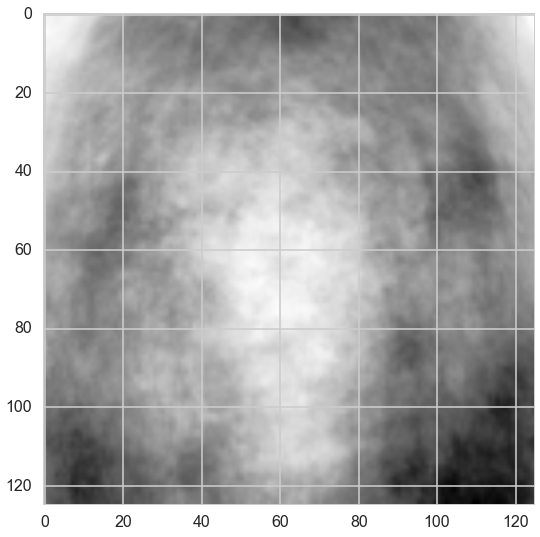

In [213]:
alignedMean = np.mean(smallSet,axis=0);
plt.imshow(alignedMean);

#alignedMean = np.mean(alignedSet,axis=0);
#plt.imshow(alignedMean);

In [41]:
#viableIndices
alignedSetNew=smallSet

In [42]:
dims = alignedSetNew[0].shape
vecLen = dims[0]*dims[1]
matsAsVects=[]

for im in alignedSetNew:
    matsAsVects.append(np.reshape(im,vecLen))
    
#now matsAsVects is a vector of 182 of these 106800-vectors.

The $i$th ROW of the following matrix $X$ corresponds to the flattened matrix `alignedSet[0]`.

In [43]:
#X = np.concatenate(np.transpose([matsAsVects]),axis=1)
Y = np.transpose(np.concatenate(np.transpose([smallSet])))
X = Y[0,:,:]

In [44]:
#Bootstrappin'.
numSamps = X.shape[0]
indboot = np.random.choice(range(0,numSamps),vecLen-numSamps)
Xboot = []
count = 0
for i in indboot:
    Xboot.append(X[i])
    count = count +1
Xboot = np.concatenate([X,Xboot])
Xboot.shape

0  of  15443
1  of  15443
2  of  15443
3  of  15443
4  of  15443
5  of  15443
6  of  15443
7  of  15443
8  of  15443
9  of  15443
10  of  15443
11  of  15443
12  of  15443
13  of  15443
14  of  15443
15  of  15443
16  of  15443
17  of  15443
18  of  15443
19  of  15443
20  of  15443
21  of  15443
22  of  15443
23  of  15443
24  of  15443
25  of  15443
26  of  15443
27  of  15443
28  of  15443
29  of  15443
30  of  15443
31  of  15443
32  of  15443
33  of  15443
34  of  15443
35  of  15443
36  of  15443
37  of  15443
38  of  15443
39  of  15443
40  of  15443
41  of  15443
42  of  15443
43  of  15443
44  of  15443
45  of  15443
46  of  15443
47  of  15443
48  of  15443
49  of  15443
50  of  15443
51  of  15443
52  of  15443
53  of  15443
54  of  15443
55  of  15443
56  of  15443
57  of  15443
58  of  15443
59  of  15443
60  of  15443
61  of  15443
62  of  15443
63  of  15443
64  of  15443
65  of  15443
66  of  15443
67  of  15443
68  of  15443
69  of  15443
70  of  15443
71  of  15443
72

(15625, 15625)

In [215]:
#from Lab 5

# miniblocks =[]
# testsize =10000
# for x in Xboot[0:(testsize^2)]:
#     miniblocks.append(x[0:testsize][0:testsize])
    
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

First principal component of a winner? So we can have a side-by-side comparison.

WHAT THE WHAT this thing took an hour and a half!

In [216]:
#import time
#start = time.time()
#Xvec = pca.fit_transform(Xboot)
#end = time.time()
#print "That took " ,end - start, " seconds."

That took  5339.78481507  seconds.


In [256]:
np.save("pca_copy",pca)

In [257]:
pca.components_[0] #should be equal to the mean of the faces

array([ 0.00395073,  0.00413697,  0.00440736, ...,  0.01104015,
        0.01097309,  0.0105846 ])

In [232]:
#from Lab 5
testsize = 15625
def normit(a):
    a=(a - a.min())/(a.max() -a.min())
    a=a*256
    return np.round(a)
def getNC(pc, j):
    size=testsize*testsize
    r=pc.components_[j]#[0:size:3]
    r=normit(r)
    return r
def display_component(pc, j):
    r = getNC(pc,j)
    r = np.array(r)
    myArray = np.zeros((np.sqrt(testsize)), 'uint8')
    myArray = np.transpose(np.reshape(r,(np.sqrt(testsize),np.sqrt(testsize))))
    plt.imshow(myArray)
    plt.xticks([])
    plt.yticks([])

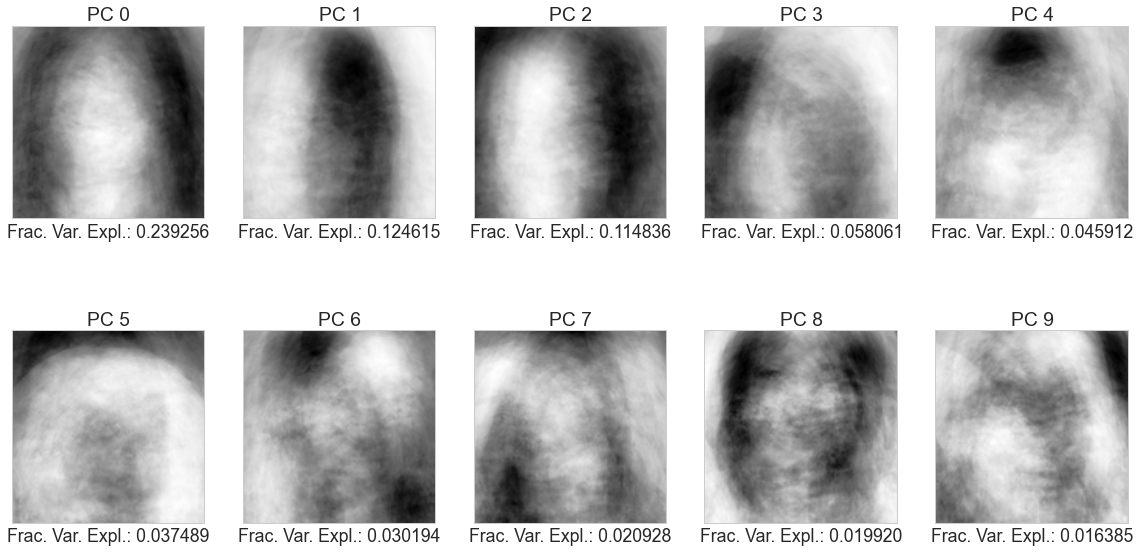

In [439]:

def display_pc(pc, j,ax):
    r = getNC(pc,j)
    r = np.array(r)
    myArray = np.zeros((np.sqrt(testsize)), 'uint8')
    myArray = np.transpose(np.reshape(r,(np.sqrt(testsize),np.sqrt(testsize))))
    ax.imshow(myArray)
    
#display_component(pca,2)
fig = plt.figure(figsize=(20,10))
count = 0
for r in range(0,10):
    s=fig.add_subplot(2,5,r+1)
    s.set_title("PC %d" % r)
    s.set_xlabel("Frac. Var. Expl.: %f" % pca.explained_variance_ratio_[r] )
    s.set_xticks([])
    s.set_yticks([])
    display_pc(pca,r,s)

Seventy percent of the variance can be explained by these top 10 principal components.

In [265]:
len(Xvec[0:182,i]),len(allNames)

(182, 182)

In [364]:
##season winners
win_ind = [46,52,81,106,129,181]

##first runners up
run_ind = [10,43,50,92,119,140,157]

##eliminated round 1
season13elim = [0,1,2,4,5,13,16,18,19,21]
season14elim = [22,26,27,31,33,37,38,41,42,44]
season15elim = [48,51,53,55,58,59,62,69,70,71]
season16elim = [75,77,82,86,93,99]
season17elim = [103,104,111,113,115,116]
season18elim = [151,149,146,142,135,134,133,130,126]
season19elim = [153,158,160,167,169,172,173,175]

elim_ind = np.concatenate([season13elim,season14elim,season15elim,season16elim,season17elim,season18elim,season19elim])

In [366]:
##AFTER the PCA process, we add success labels
winners = np.zeros((len(allNames),)) # 0: all others
winners[win_ind] = [1,1,1,1,1,1] #1: season winners
winners[run_ind] = [.5,.5,.5,.5,.5,.5,.5] #0.5: runners up
winners[elim_ind] = [-1,-1,-1,-1,-1,-1,-1] #-1: elim first week

df = pd.DataFrame({"name":allNames,"winner":winners})
for i in range(pca.explained_variance_ratio_.shape[0]):
    df["pc%i" % (i+1)] = Xvec[0:182,i]
df.head(20)

,name,winner,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,Ann,-1.0,333.030973,-832.990257,-4455.777158,-2287.666259,1165.447774,-845.679447,1589.361471,2485.207722,-699.249813,-705.050488
1,Dominique,-1.0,1836.947700,-219.211566,3661.694986,704.234956,-2565.086450,-675.603988,-1743.383590,722.510748,-1728.273023,-13.924997
2,Emily,-1.0,-1292.011154,-1556.000928,2182.629186,-1138.572485,436.689851,668.198427,403.068711,115.414179,1871.484634,-675.024079
3,Erica,0.0,1964.096627,-2548.440160,-1541.370362,-1732.080615,619.464580,-793.848366,325.231611,1436.554222,514.411939,363.519619
4,Jackie,-1.0,818.678733,6262.001920,2654.231456,992.747624,-341.401627,2554.089965,-403.339241,545.354728,-902.885748,577.401197
5,Julie,-1.0,736.866559,325.384509,-3165.942077,-4413.589633,-423.704849,1321.989922,1065.380144,-1197.919186,-547.756388,57.886503
6,Kari,0.0,2898.790328,-1696.231904,3077.722116,769.055395,-2692.743948,-269.642815,-659.433071,-724.948712,-2056.514325,1692.699458
7,Lauren,0.0,2032.382452,2362.508108,3957.214386,-68.471149,-945.715845,-33.586293,-667.687069,509.964935,-993.529019,-158.013127
8,Lisa,0.0,418.623299,-2599.437029,-2487.700549,-3372.945596,-1506.434459,-944.703529,3774.572607,318.817305,-485.666868,480.106699
9,Megan,0.0,6638.845122,-300.842799,-866.802938,211.495407,3976.211552,206.587406,-1487.453196,-176.781869,644.086983,103.950828


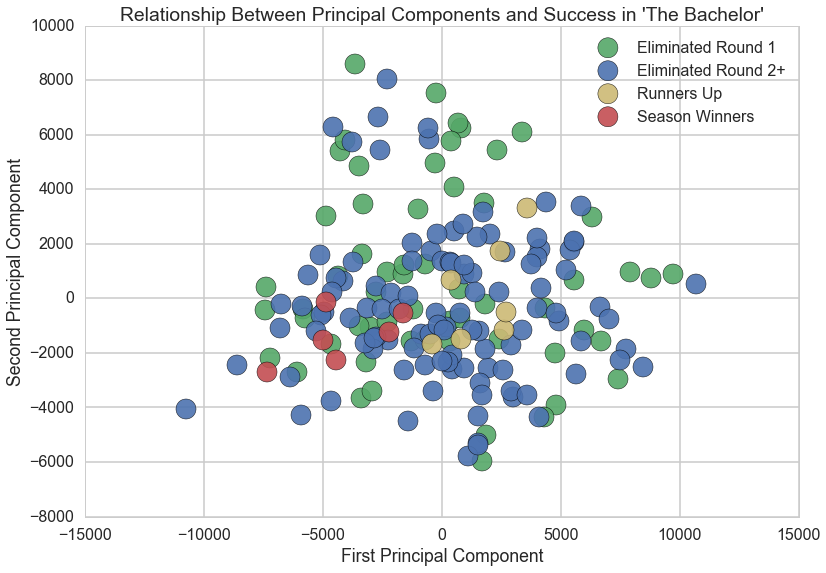

In [396]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]
c3=sns.color_palette()[3]
c4=sns.color_palette()[4]

colors = [c1,c0,c4,c2]
for label, color, transp in zip(df['winner'].unique(), colors,[0.9,0.9,0.9,0.9]):
    mask = df['winner']==label
    plt.scatter(df[mask]['pc1'], df[mask]['pc2'], c=color, label=label,s=400,alpha=transp);
plt.legend(["Eliminated Round 1","Eliminated Round 2+","Runners Up","Season Winners"]);
plt.title("Relationship Between Principal Components and Success in 'The Bachelor'")
plt.xlabel("First Principal Component");
plt.ylabel("Second Principal Component");

In [397]:
#[df['name'][j] for j in win_ind]

In [398]:
#[(i, allNames[i]) for i in range(0,len(allNames))] 

In [ ]:
fig1 = plt.figure(figsize=(40,30))
fig1.suptitle("Season Winners",fontsize=40)
count = 0
for a in win_ind:
    count = count+1
    s=fig1.add_subplot(10,10,count)
    s.imshow(alignedSetNew[int(a)])
    s.set_xticks([])
    s.set_yticks([])
    
fig2 = plt.figure(figsize=(40,30))
fig2.suptitle("First Runners Up",fontsize=40)
count = 0
for a in run_ind:
    count = count+1
    s=fig2.add_subplot(10,10,count)
    s.imshow(alignedSetNew[int(a)])
    s.set_xticks([])
    s.set_yticks([])
    
fig3 = plt.figure(figsize=(20,20))
fig3.suptitle("Eliminated Round 1",fontsize=40)
count = 0
for a in elim_ind:
    count = count+1
    s=fig3.add_subplot(10,10,count)
    s.imshow(alignedSetNew[int(a)])
    s.set_xticks([])
    s.set_yticks([])    